## Assignment 5

Name: Praveen Kamal

Reg No: 21BCE0468

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df = df.drop("CustomerID", axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [37]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Encoding "Gender" column

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Gender.head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

### Visualisations

<Axes: xlabel='Age', ylabel='Density'>

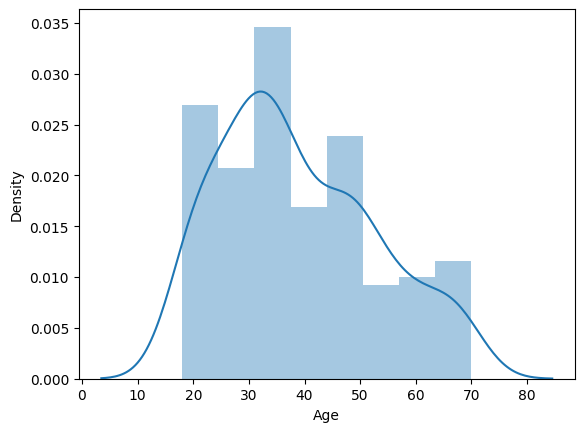

In [25]:
sns.distplot(df.Age)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

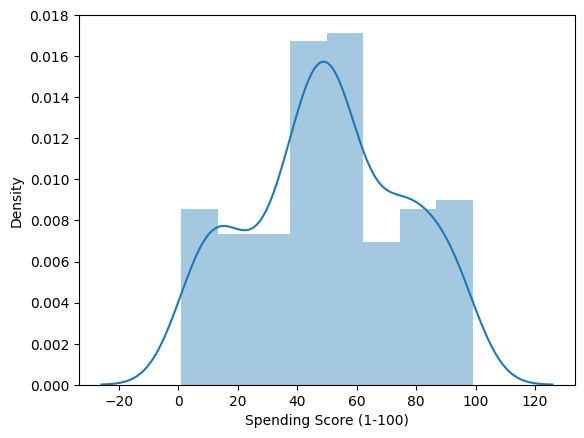

In [26]:
sns.distplot(df["Spending Score (1-100)"])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

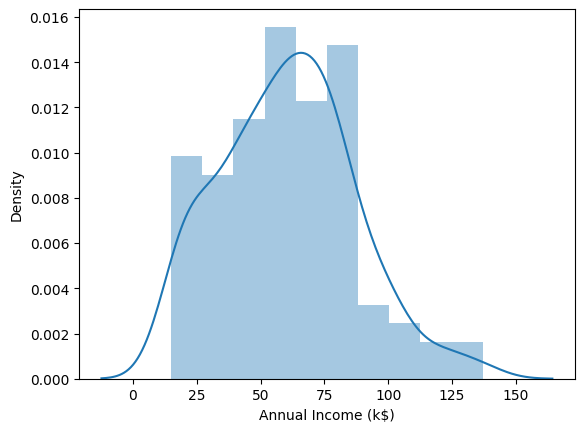

In [27]:
sns.distplot(df["Annual Income (k$)"])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

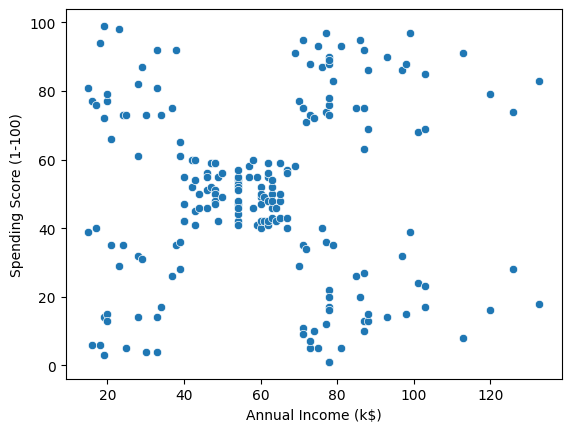

In [32]:
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

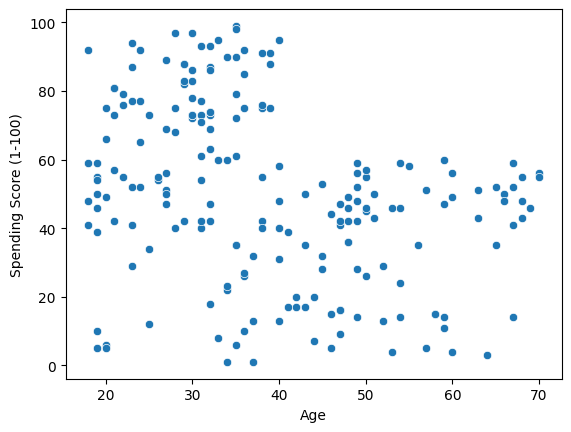

In [33]:
sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"])

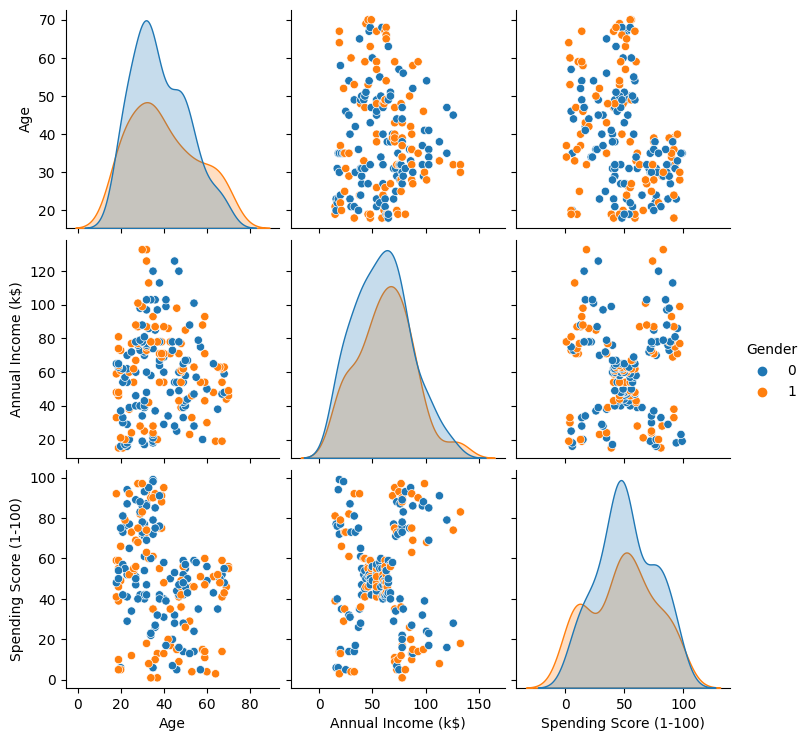

In [35]:
sns.pairplot(df, hue="Gender")

In [40]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


<Axes: >

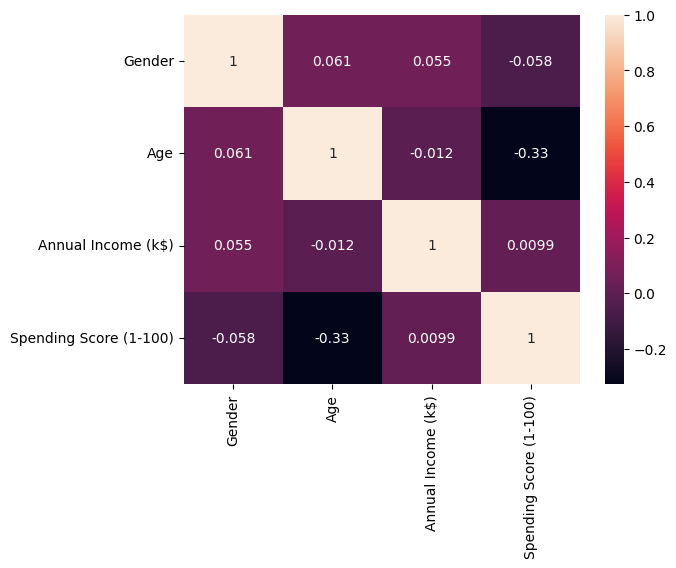

In [43]:
sns.heatmap(df.corr(), annot=True)

### Dealing with outliers

<Axes: >

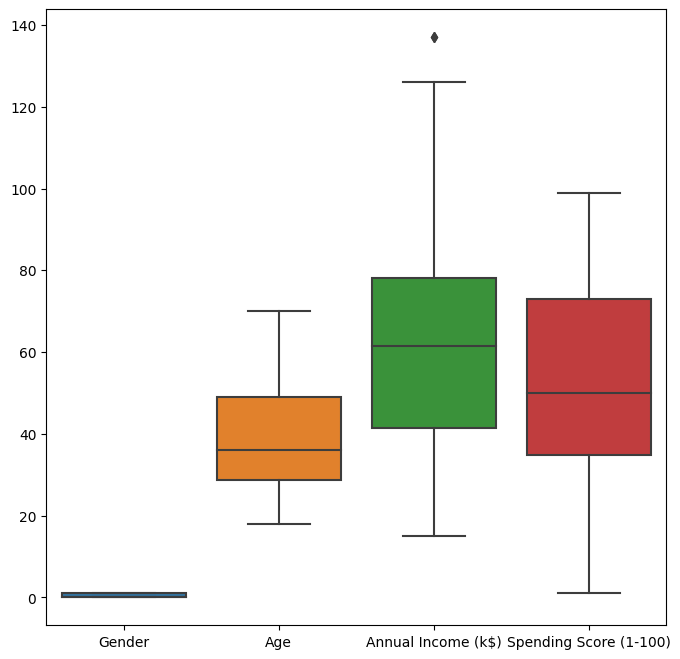

In [29]:
plt.figure(figsize=(8, 8))
sns.boxplot(df)

<Axes: >

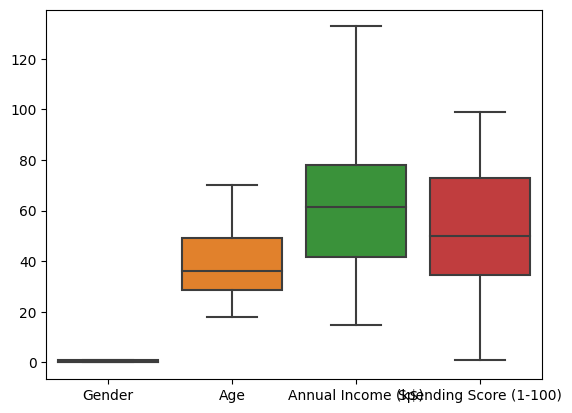

In [31]:
q1 = df["Annual Income (k$)"].quantile(0.25)
q3 = df["Annual Income (k$)"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"] > upper_limit, upper_limit, df["Annual Income (k$)"])
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"] < lower_limit, lower_limit, df["Annual Income (k$)"])

sns.boxplot(df)

### Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.745429,-0.434801
1,1.128152,-1.281035,-1.745429,1.195704
2,-0.886405,-1.352802,-1.707083,-1.715913
3,-0.886405,-1.137502,-1.707083,1.040418
4,-0.886405,-0.563369,-1.668737,-0.395980


### Choosing the number of clusters using the elbow method

In [98]:
from sklearn import cluster

inertia = []

for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

In [82]:
inertia

[1129.6799999999998,
 761.5283991859856,
 558.3066829854299,
 438.21000288624373,
 325.55874750092676,
 281.19286149800564,
 240.9519809001669,
 213.6627578565127,
 181.80952888525883,
 157.70438250915586]

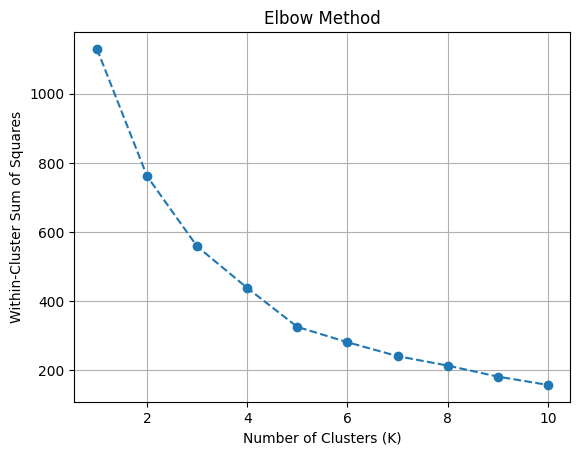

In [83]:
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


### Training the model

In [102]:
k = 5
kmeans = cluster.KMeans(n_clusters=k, init="k-means++", random_state=0)
clusters = kmeans.fit_predict(df_scaled)

In [105]:
df_scaled["Cluster"] = clusters
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.128152,-1.424569,-1.745429,-0.434801,0
1,1.128152,-1.281035,-1.745429,1.195704,0
2,-0.886405,-1.352802,-1.707083,-1.715913,3
3,-0.886405,-1.137502,-1.707083,1.040418,2
4,-0.886405,-0.563369,-1.668737,-0.395980,3


### Visualising the clusters

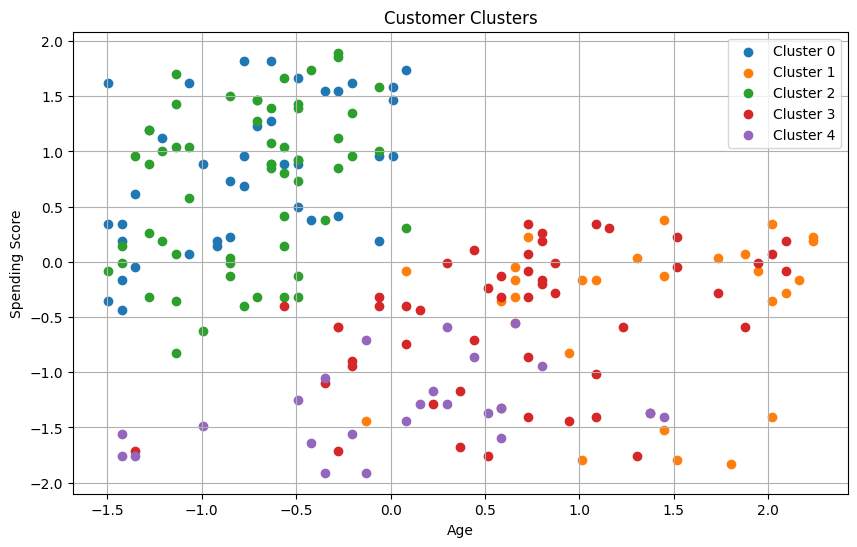

In [106]:
plt.figure(figsize=(10, 6))

for cluster in range(k):
    plt.scatter(
        df_scaled[df_scaled['Cluster'] == cluster]["Age"],
        df_scaled[df_scaled['Cluster'] == cluster]["Spending Score (1-100)"],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.legend()
plt.grid(True)
plt.show()


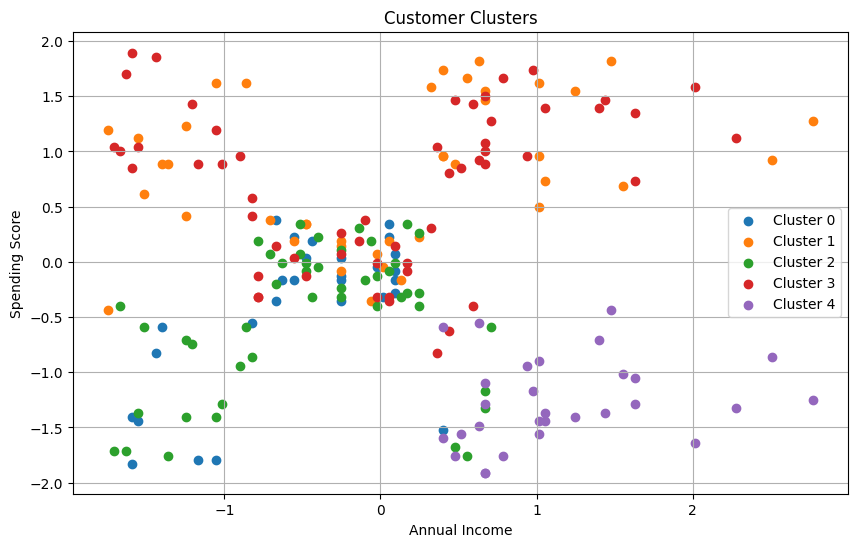

In [87]:

plt.figure(figsize=(10, 6))

for cluster in range(k):
    plt.scatter(
        df_scaled[df_scaled['Cluster'] == cluster]["Annual Income (k$)"],
        df_scaled[df_scaled['Cluster'] == cluster]["Spending Score (1-100)"],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.legend()
plt.grid(True)
plt.show()

### Testing the model with random observations

In [107]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.128152,-1.424569,-1.745429,-0.434801,0
1,1.128152,-1.281035,-1.745429,1.195704,0
2,-0.886405,-1.352802,-1.707083,-1.715913,3
3,-0.886405,-1.137502,-1.707083,1.040418,2
4,-0.886405,-0.563369,-1.668737,-0.395980,3


In [109]:
kmeans.predict([[-0.886405, -1.352802, -1.707083, -1.715913]])

array([3], dtype=int32)

In [108]:
kmeans.predict([[1.128152, -1.281035, -1.745429, 1.195704]])

array([0], dtype=int32)